# Bootstrap hypothesis testing

Efron and Tibshirani suggest the algorithm for comparing the means of two independent samples.

[An Introduction to the Bootstrap]()  
[wiki](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

1. Calculate the test statistic
   $$
   t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}
   $$
1. Create two new data sets:
   $$
       \begin{aligned}
       x'_i&=x_i-\bar{x}+\bar{z} \\
       y'_i&=y_i-\bar{y}+\bar{z} \\
       \end{aligned}
   $$
   where $\bar{z}$ is the mean of the combined sample
1. Draw a random sample $x^*_i$ of size $n$ with replacement from $x'_i$ and another random sample $y^*_i$ of size $m$ with replacement from $y'_i$
1. Calculate the test statistic
   $$
   t^*=\frac{\bar{x*}-\bar{y*}}{\sqrt{\sigma_x^*2/n_x+\sigma_y^*2/n_y}}
   $$
1. Repeat 3 and 4 B times(eg B=1000) to collect B values of the test statistic.
1. Estimate the p-value as 

$$
p=\frac{count(t^*_i\geq t)}{B}
$$

Note:
The two-sample t-test for unpaired data is defined as:
$$
\begin{aligned}
H_0&:	&\mu_1&=\mu_2 \\
H_a&:	&\mu_1&≠\mu_2
\end{aligned}
$$
Test Statistic:	$T=\frac{\bar{Y_1}-\bar{Y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$
where $N_1$ and $N_2$ are the sample sizes, $\bar{Y_1}$ and $\bar{Y_2}$ are the sample means, and $s^2_1$ and $s^2_2$ are the sample variances.

If equal variances are assumed, then the formula reduces to:

$T=\frac{\bar{Y_1}-\bar{Y_2}}{s_p\sqrt{1/N_1+1/N_2}}$
where
$s^2_p=\frac{(N_1−1)s^2_1+(N_2−1)s^2_2}{N_1+N_2−2}$

If variances and size are also equal, then:
$T=\frac{\bar{Y_1}-\bar{Y_2}}{s\sqrt{2/N}}$


In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Population is $X ~~ N(1.12345,3.678679)$

In [344]:
population_mean = 1.12345
population_var  = 3.678679
population_size = int(1e7)
population = population_mean + population_var**0.5*np.random.randn(population_size)

Can change the population to something other than normal population

In [345]:
population = np.random.chisquare(30,population_size)


In [346]:
population

array([43.65510762, 25.29812346, 31.31937673, ..., 26.36857244,
       34.4559718 , 30.53105192])

(array([4.663700e+04, 1.626926e+06, 4.392036e+06, 2.949827e+06,
        8.354790e+05, 1.334670e+05, 1.435700e+04, 1.181000e+03,
        8.700000e+01, 3.000000e+00]),
 array([ 4.79363448, 13.68101937, 22.56840427, 31.45578916, 40.34317405,
        49.23055895, 58.11794384, 67.00532873, 75.89271363, 84.78009852,
        93.66748341]),
 <BarContainer object of 10 artists>)

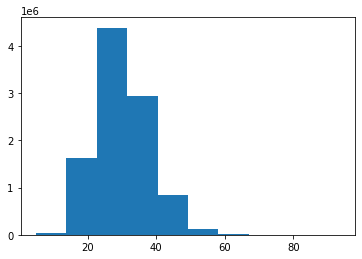

In [347]:
plt.hist(population)

Draw two sample (X and Y) from population  
X has size of 1000 and Y has size of 4000

In [348]:
size_x = 1000
size_y = 4000

sample_x = np.random.choice(population, size=size_x, replace=False)
sample_y = np.random.choice(population, size=size_y, replace=False)


(array([  84.,  563., 1110., 1140.,  666.,  299.,  110.,   18.,    8.,
           2.]),
 array([10.57148419, 16.39978158, 22.22807897, 28.05637636, 33.88467375,
        39.71297114, 45.54126853, 51.36956592, 57.19786331, 63.0261607 ,
        68.85445809]),
 <BarContainer object of 10 artists>)

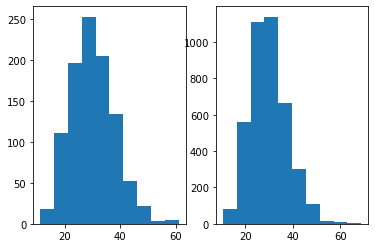

In [349]:
plt.subplot(121)
plt.hist(sample_x)
plt.subplot(122)
plt.hist(sample_y)


Test if they are from the same population

the test statistic:
$t=\frac{\bar{x}-\bar{y}}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}$

In [350]:
mean_x = np.mean(sample_x)
mean_y = np.mean(sample_y)
combined_mean = np.mean(np.concatenate([sample_x, sample_y]))

In [351]:
mean_x, mean_y

(30.079619243348336, 29.856223926568497)

In [352]:
def single_bootstrap_sample(sample: np.ndarray):
    return np.random.choice(sample, size=len(sample), replace=True) - np.mean(sample) - combined_mean


def single_bootstrap_statistic(sample_x: np.ndarray, sample_y: np.ndarray, statistic_func):
    bootstrapped_x, bootstrapped_y = single_bootstrap_sample( sample_x), single_bootstrap_sample(sample_y)
    return statistic_func(bootstrapped_x, bootstrapped_y)


def statistic_method(sample1: np.ndarray, sample2: np.ndarray):
    statistic = (np.mean(sample1)-np.mean(sample2))/np.sqrt(np.var(sample1,
                                                                     ddof=1)/len(sample1)+np.var(sample2, ddof=1)/len(sample2))
    return statistic

In [353]:
t_statistic = statistic_method(sample_x, sample_y)
t_statistic

0.8120534617752664

Hence, the sampled (original) t-statistic = 0.41846568534825734

In [354]:
single_bootstrap_statistic(sample_x,sample_y,statistic_method)

0.05945063297922642

In [355]:
bootstrap_time = 10000
bootstrapped_t_statistics = []
for i in range(bootstrap_time):
    bootstrapped_t_statistics.append(
        single_bootstrap_statistic(sample_x, sample_y, statistic_method)
    )


In [356]:
bootstrapped_t_statistics

[-0.5783508168961484,
 -1.220635164996969,
 -1.5564419763639066,
 -0.9601834736153434,
 -2.8157067772257163,
 -0.360475370061536,
 -0.23297567252672655,
 -1.8257424091333987,
 1.18168659576153,
 -0.706877986110675,
 0.8497243006429991,
 0.5023130749306032,
 -1.5496107463493547,
 -1.1991950911810494,
 2.042783279395927,
 -0.42086933082144673,
 0.29253914855331326,
 0.8756954256449085,
 0.2064298633343487,
 1.5858753501016398,
 -0.6153436675207686,
 0.7934696032822489,
 -0.42046487198210697,
 -0.1313502972049308,
 -0.5621521389271606,
 -0.5308569348452932,
 -0.8495422059194885,
 -0.2834720591802923,
 -0.14180770417591684,
 -1.0375187314921392,
 -0.10851571052747934,
 0.05771681306121314,
 -0.7959751618214915,
 0.15907314270846662,
 0.07868055063583959,
 0.580491869771542,
 -0.4416049180691631,
 0.49867603103731734,
 -0.9712705906548784,
 1.1703459041757993,
 0.30487614706859223,
 0.9323012649391332,
 0.6070694178289867,
 1.124122921174265,
 0.6111997629881237,
 0.8933207204856971,
 -0.21

In [357]:
t_statistic

0.8120534617752664

In [358]:
np.sum((bootstrapped_t_statistics>=t_statistic).astype(int))

2090

In [359]:
(bootstrapped_t_statistics>=t_statistic).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [360]:
np.sum(np.where(bootstrapped_t_statistics>=t_statistic,1,0))

2090

In [361]:
p_value = np.sum((bootstrapped_t_statistics>=t_statistic).astype(int))/bootstrap_time
p_value

0.209

Since p-value = 0.3345  
we cannot reject the null hypothesis and accept that X and Y have the same mean.